<a href="https://colab.research.google.com/github/PChan8128/Pchan8128.github.io/blob/main/PC6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

file_path = '/content/telescope_data.csv'
# Load the dataset into a DataFrame
df = pd.read_csv(file_path)
df = df.iloc[:, :-1]
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


1. Computing the multivariate mean vector

In [ ]:
mean_vector = df.mean()
print("Multivariate Mean Vector:\n")
print("Attribute    Value")
print(mean_vector)

Multivariate Mean Vector:

Attribute    Value
fLength      57.675030
fWidth       24.015214
fSize         2.873639
fConc         0.363390
fConc1        0.207434
fAsym        -3.221765
fM3Long      13.136590
fM3Trans      1.791702
fAlpha       31.526518
fDist       197.804527
dtype: float64


2. Computing the sample covariance matrix as inner products between the columns of the centered data matrix

In [ ]:
numeric_data = df.iloc[:, :-1]
mean_vector = np.mean(numeric_data, axis=0)

centered_data = numeric_data - mean_vector
# sample covariance matrix using the inner product method
covariance_matrix_inner = centered_data.T.dot(centered_data)/(centered_data.shape[0]-1)
print("\nSample Covariance Matrix (Inner Product):\n")
print(covariance_matrix_inner)


Sample Covariance Matrix (Inner Product):

              fLength      fWidth      fSize     fConc    fConc1        fAsym  \
fLength   1766.710603  731.278208  13.877761 -4.795976 -2.754310  -338.521963   
fWidth     731.278208  511.310810   7.031488 -2.230835 -1.292486   254.802711   
fSize       13.877761    7.031488   0.226271 -0.067494 -0.038788     0.460739   
fConc       -4.795976   -2.230835  -0.067494  0.029483  0.017875     0.329190   
fConc1      -2.754310   -1.292486  -0.038788  0.017875  0.011461     0.154446   
fAsym     -338.521963  254.802711   0.460739  0.329190  0.154446  3899.838668   
fM3Long   -317.091670 -419.194118   1.608942 -0.884361 -0.605827  -263.597250   
fM3Trans   134.197204   76.420843   0.648693 -0.393915 -0.209961    15.496390   
fAlpha     -42.699515   34.672026  -2.846388  1.319799  0.710753    10.170821   

              fM3Long    fM3Trans      fAlpha  
fLength   -317.091670  134.197204  -42.699515  
fWidth    -419.194118   76.420843   34.672026  
f

3. Compute the sample covariance matrix as outer product between the centered data points.

In [ ]:
# sample covariance matrix as outer product between the centered data points
covariance_matrix_outer = np.dot(centered_data.T, centered_data) / (len(centered_data) - 1)
print("\nSample Covariance Matrix (Outer Product):\n")
print(covariance_matrix_outer)


Sample Covariance Matrix (Outer Product):

[[ 1.76671060e+03  7.31278208e+02  1.38777613e+01 -4.79597589e+00
  -2.75430985e+00 -3.38521963e+02 -3.17091670e+02  1.34197204e+02
  -4.26995152e+01]
 [ 7.31278208e+02  5.11310810e+02  7.03148837e+00 -2.23083506e+00
  -1.29248588e+00  2.54802711e+02 -4.19194118e+02  7.64208425e+01
   3.46720258e+01]
 [ 1.38777613e+01  7.03148837e+00  2.26271192e-01 -6.74936308e-02
  -3.87883133e-02  4.60739147e-01  1.60894156e+00  6.48693246e-01
  -2.84638820e+00]
 [-4.79597589e+00 -2.23083506e+00 -6.74936308e-02  2.94825044e-02
   1.78747973e-02  3.29189889e-01 -8.84361090e-01 -3.93915412e-01
   1.31979942e+00]
 [-2.75430985e+00 -1.29248588e+00 -3.87883133e-02  1.78747973e-02
   1.14612948e-02  1.54446386e-01 -6.05826971e-01 -2.09961420e-01
   7.10752532e-01]
 [-3.38521963e+02  2.54802711e+02  4.60739147e-01  3.29189889e-01
   1.54446386e-01  3.89983867e+03 -2.63597250e+02  1.54963897e+01
   1.01708214e+01]
 [-3.17091670e+02 -4.19194118e+02  1.60894156e+00 

4. Computing the eigen values and eigen vectors of the covariance matrix that is computed from attributes 7, and 8

In [ ]:
selected_attributes = df.iloc[:, 6:8]
covariance_matrix = np.cov(selected_attributes, rowvar=False)
# Computing eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[2857.93049538  457.49913084]

Eigenvectors:
[[ 0.99865762 -0.05179726]
 [ 0.05179726  0.99865762]]


5. Compute the covariance matrix between attributes 3,7, and 8

In [ ]:
selected_attributes = df.iloc[:, [2, 6, 7]]
covariance_matrix = np.cov(selected_attributes, rowvar=False)
print("Covariance Matrix between # 3,7 & 8 attribute:\n")
print(covariance_matrix)

Covariance Matrix between # 3,7 & 8 attribute:

[[2.26271192e-01 1.60894156e+00 6.48693246e-01]
 [1.60894156e+00 2.85149024e+03 1.24168867e+02]
 [6.48693246e-01 1.24168867e+02 4.63939383e+02]]


6. Converting attribute 2 to a categorical attribute with 4 categories then computing the covariance matrix of the new attribute.

In [ ]:
attribute_2_values = df.iloc[:, 1]
# Compute quartile values
first_quartile = attribute_2_values.quantile(0.25)
median = attribute_2_values.median()
third_quartile = attribute_2_values.quantile(0.75)
# Create a new categorical column based on quartile values
df['Attribute_2_Category'] = pd.cut(attribute_2_values,
                                    bins=[float('-inf'), first_quartile, median, third_quartile, float('inf')],
                                    labels=['Category1', 'Category2', 'Category3', 'Category4'])
# Computing the covariance matrix of the new categorical attribute
covariance_matrix = pd.get_dummies(df['Attribute_2_Category']).cov()
print("Covariance Matrix of the new categorical attribute: \n")
print(covariance_matrix)

Covariance Matrix of the new categorical attribute: 

           Category1  Category2  Category3  Category4
Category1   0.190299  -0.063433  -0.063433  -0.063433
Category2  -0.063433   0.187811  -0.062189  -0.062189
Category3  -0.063433  -0.062189   0.187811  -0.062189
Category4  -0.063433  -0.062189  -0.062189   0.187811


7. Plot Empirical CDFs of Attributes,4,6, and 8

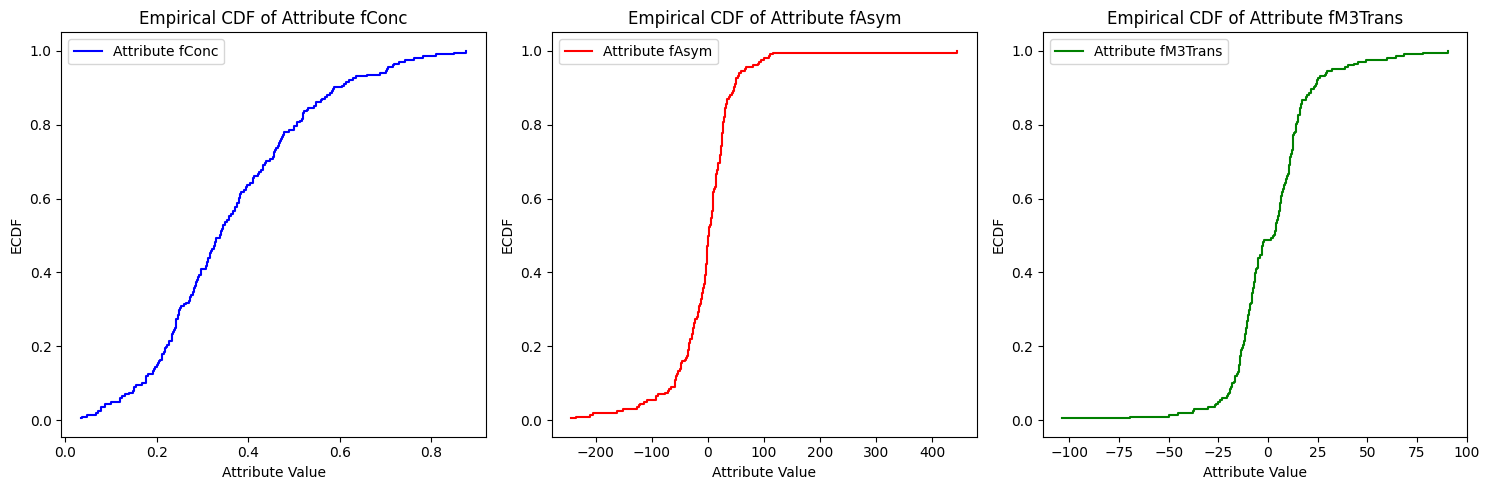

In [ ]:
attributes_to_plot = [3, 5, 7]
selected_attributes = df.iloc[:, attributes_to_plot]
colors = ['blue', 'red', 'green']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (col, ax, color) in enumerate(zip(selected_attributes.columns, axes, colors), 1):
    sorted_data = np.sort(selected_attributes[col])
    ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    ax.step(sorted_data, ecdf, label=f'Attribute {col}', where='post', color=color)


    ax.set_xlabel('Attribute Value')
    ax.set_ylabel('ECDF')
    ax.set_title(f'Empirical CDF of Attribute {col}')
    ax.legend()
plt.tight_layout()
plt.show()

8. Computing the covariance matrix of attribute 10

In [ ]:
attribute_10 = df.iloc[:, 9]
covariance_matrix = df[[attribute_10.name]].cov()
print("Covariance Matrix of Attribute 10:\n")
print(covariance_matrix)

Covariance Matrix of Attribute 10:

             fDist
fDist  6361.467591


9. Computing the correlation between Attributes 1 and 2 by computing the cosine of the angle between the centered attribute vectors(&Scatterplot)

Correlation (Cosine Similarity) between Attributes 1 and 2 is 0.769 



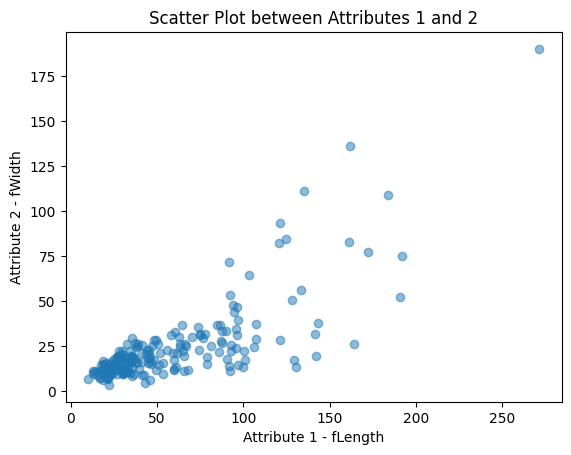

In [ ]:
attribute_1 = df.iloc[:, 0]
attribute_2 = df.iloc[:, 1]
centered_attribute_1 = attribute_1 - attribute_1.mean()
centered_attribute_2 = attribute_2 - attribute_2.mean()
cosine_similarity = np.dot(centered_attribute_1, centered_attribute_2) / (np.linalg.norm(centered_attribute_1) * np.linalg.norm(centered_attribute_2))
print("Correlation (Cosine Similarity) between Attributes 1 and 2 is", round(cosine_similarity,3),"\n")
# Plotting
plt.scatter(attribute_1, attribute_2, alpha=0.5)
plt.title('Scatter Plot between Attributes 1 and 2')
plt.xlabel('Attribute 1 - fLength')
plt.ylabel('Attribute 2 - fWidth')
plt.show()

10. Assuming that Attribute 1 is normally distributed, plot its probability density function.

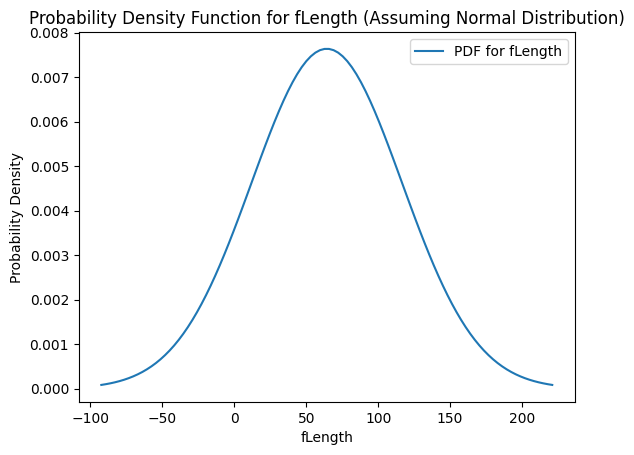

In [ ]:
# Calculating mean and standard deviation
mu = np.mean(fLength_data)
sigma = np.std(fLength_data)
# Generate values for the x-axis
x = np.linspace(mu- 3*sigma,mu+ 3*sigma,100)
# PDF using the normal distribution formula
pdf = norm.pdf(x, mu, sigma)
# Plotting
plt.plot(x, pdf, label='PDF for fLength')
plt.xlabel('fLength')
plt.ylabel('Probability Density')
plt.title('Probability Density Function for fLength (Assuming Normal Distribution)')
plt.legend()
plt.show()

11. Which attribute has the largest variance, and which attribute has the smallest variance? Print these values.

In [ ]:
numeric_attributes = df.iloc[:, :-1]
# Calculate variances for each attribute
variances = numeric_attributes.var()
# the attribute with the largest and smallest variance
max_variance_attribute = variances.idxmax()
min_variance_attribute = variances.idxmin()
print(f"Attribute with the largest variance: {max_variance_attribute}, Variance: {variances[max_variance_attribute]:.2f}")
print(f"Attribute with the smallest variance: {min_variance_attribute}, Variance: {variances[min_variance_attribute]:.2f}")

Attribute with the largest variance: fDist, Variance: 6361.47
Attribute with the smallest variance: fConc1, Variance: 0.01


11. Which pair of attributes has the largest covariance, and which pair of attributes has the smallest covariance? Print these values.

In [ ]:
# Calculate covariances for each pair of attributes
covariance_matrix = numeric_attributes.cov()

# Set the diagonal elements of the covariance matrix to NaN
np.fill_diagonal(covariance_matrix.values, np.nan)

# Find the pair of attributes with the largest and smallest covariance
max_covariance_pair = np.unravel_index(np.nanargmax(covariance_matrix.values), covariance_matrix.shape)
min_covariance_pair = np.unravel_index(np.nanargmin(covariance_matrix.values), covariance_matrix.shape)

# Get attribute names for the pair of attributes
max_covariance_attribute1, max_covariance_attribute2 = numeric_attributes.columns[max_covariance_pair[0]], numeric_attributes.columns[max_covariance_pair[1]]
min_covariance_attribute1, min_covariance_attribute2 = numeric_attributes.columns[min_covariance_pair[0]], numeric_attributes.columns[min_covariance_pair[1]]

# Print the results with attribute names and rounded covariance values
print(f"Pair of attributes with the largest covariance: ({max_covariance_attribute1}, {max_covariance_attribute2}), Covariance: {covariance_matrix.iloc[max_covariance_pair]:.2f}")
print(f"Pair of attributes with the smallest covariance: ({min_covariance_attribute1}, {min_covariance_attribute2}), Covariance: {covariance_matrix.iloc[min_covariance_pair]:.2f}")


Pair of attributes with the largest covariance: (fLength, fDist), Covariance: 1088.51
Pair of attributes with the smallest covariance: (fAsym, fDist), Covariance: -659.97


13. Plotting attribute 2 vs attribute 5 . Mark each point as a circle.

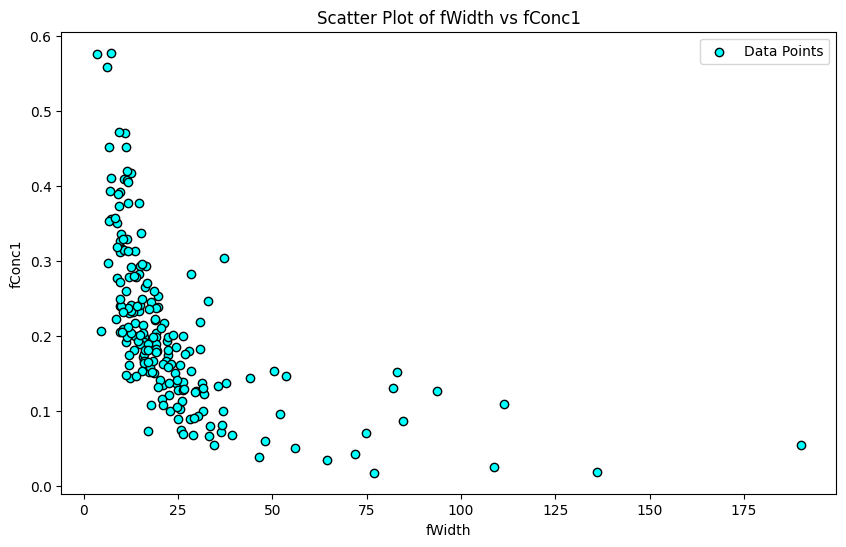

In [ ]:
attribute_2_column_name = df.columns[1]
attribute_5_column_name = df.columns[4]

# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[attribute_2_column_name], df[attribute_5_column_name], marker='o', edgecolors='black', facecolors='cyan', label='Data Points')

# Add labels and title
plt.xlabel(attribute_2_column_name)
plt.ylabel(attribute_5_column_name)
plt.title(f'Scatter Plot of {attribute_2_column_name} vs {attribute_5_column_name}')

# Show the plot
plt.legend()
plt.show()